In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt

def present(directory):
    final_dists = []
    boxes = []
    boxes_x = []
    trials_boxes_x = []
    references = []
    best_archive_gaits_performances = []
    num_trials_per_damage = []
    
    dmgid = 0
    box_counter = 0
    
    for dmgdir in sorted(os.listdir(directory + "/iteresults")):
        best_archive_gaits = np.loadtxt(directory + "/iteresults/" + dmgdir + "/max_archive_gaits.txt")
        best_archive_gaits_performances.append(best_archive_gaits)
    
    for dmgdir in sorted(os.listdir(directory + "/iteresults")):
        boxes_x.append(dmgdir)
        boxes_x.append("")
        trials_boxes_x.append(dmgdir)
        dmgid += 1
        num_trials = []
        final_dists = []
        for subdir in os.listdir(directory + "/iteresults/" + dmgdir):
            
            if subdir != "ref.txt" and subdir != "max_archive_gaits.txt":
                x = np.loadtxt(directory + "/iteresults/" + dmgdir + "/" + subdir + "/best_aggregated_observations.dat")
                best_score = x[len(x)-1][1]
                final_dists.append(best_score)
                num_trials.append(len(x))
                
        
        boxes.append(final_dists) 
        boxes.append(best_archive_gaits_performances[box_counter]) # append the best archive sol. performance for comparison 
        box_counter += 1
        
        num_trials_per_damage.append(num_trials)
        
        ref = np.loadtxt(directory + "/iteresults/" + dmgdir + "/ref.txt")
        references.append(ref)
        
    fig = plt.figure(figsize = [12,8])
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    axes.boxplot(boxes[0:18])
    axes.set_ylim([0,10])
    colors = ['y', 'b', 'g']
    markers = ['^', 'o', 's']
    labels = ['tripod', 'hill climbing', 'stair climbing']
    
    ref_count = 0
    for i in range(9):
        for j in range(len(references[i])):
            if i == 0:
                axes.plot(i+1+ref_count, references[i][j], label=labels[j], color=colors[j], marker=markers[j], markeredgecolor='k', markersize=5)
            else:
                axes.plot(i+1+ref_count, references[i][j], color=colors[j], marker=markers[j], markeredgecolor='k', markersize=5)
        ref_count += 1
        
    # ticks = np.linspace(1, len(boxes), len(boxes))
    ticks = np.linspace(1, 18, 18)
    plt.ylabel("Max covered meters in 5s", fontsize = 18)
    plt.xticks(ticks, boxes_x)
    plt.xlabel("Experiment", fontsize = 18)
    plt.title("ITE damage recovery results", fontsize = 20)
    plt.grid(axis='y')
    # plt.axvline(x=18.5, color='k', linestyle='-')
    
    i = 2.5
    while i < 30:
        plt.axvline(x=i, color='k', linestyle='--', linewidth = 0.5)
        i+=2
    plt.legend()
    
    titles = ["No\ndamage", "Middle\nleg\nremoval", "Left\nhind\nremoval","Right\nfront\nremoval","M. right\nh.left\nremoval", "Hind\nright\nremoval", "Middle\nleft\nstuck", "Spring\nstiffness\nreduction","Removed\nmiddle\nlegs"]
    for i in range(len(titles)):
        if i >= 7:
            plt.text(i*2 + 1, 7, titles[i], fontsize=12, bbox=dict(facecolor='w'))
        else:
            plt.text(i*2 + 1, 9, titles[i], fontsize=12, bbox=dict(facecolor='w'))
    
    plt.savefig(directory + "/plots/dmgmaxscore.png")
    plt.show()
        
        
    # plot environment boxplots
    fig = plt.figure(figsize = [12,8])
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    axes.boxplot(boxes[18:36])
    axes.set_ylim([0,10])
    colors = ['y', 'b', 'g']
    markers = ['^', 'o', 's']
    labels = ['tripod', 'hill climbing', 'stair climbing']
    
    ref_count = 0
    for i in range(9,18):
        for j in range(len(references[i])):
            if i == 0 or i == 9:
                axes.plot(i+1+ref_count-9, references[i][j], label=labels[j], color=colors[j], marker=markers[j], markeredgecolor='k', markersize=5)
            else:
                axes.plot(i+1+ref_count-9, references[i][j], color=colors[j], marker=markers[j], markeredgecolor='k', markersize=5)
        ref_count += 1
        
    # ticks = np.linspace(1, len(boxes), len(boxes))
    ticks = np.linspace(1, 18, 18)
    plt.ylabel("Max covered meters in 5s", fontsize = 18)
    plt.xticks(ticks, boxes_x[18:])
    plt.xlabel("Experiment", fontsize = 18)
    plt.title("ITE environment recovery results", fontsize = 20)
    plt.grid(axis='y')
    # plt.axvline(x=18.5, color='k', linestyle='-')
    
    i = 2.5
    while i < 30:
        plt.axvline(x=i, color='k', linestyle='--', linewidth = 0.5)
        i+=2
    plt.legend()
    plt.savefig(directory + "/plots/envmaxscore.png")
    
    titles = ["Bumpy\nenviron-\nment", "Stairs", "Sand\ndune","Angled\nincline","Pipes", "Rugged\nditch", "Ditch", "Thick\npipe","Thin\npipe"]
    for i in range(len(titles)):
        if i >= 7:
            plt.text(i*2 + 1, 7, titles[i], fontsize=12, bbox=dict(facecolor='w'))
        else:
            plt.text(i*2 + 1, 9, titles[i], fontsize=12, bbox=dict(facecolor='w'))
   
    
    plt.show()
        
        
    ticks = np.linspace(1, len(best_archive_gaits_performances), len(best_archive_gaits_performances))
    fig = plt.figure(figsize = [12,8])
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    axes.boxplot(num_trials_per_damage)
    plt.ylabel("No. trials to recovery", fontsize = 18)
    plt.xlabel("Experiment", fontsize = 18)
    plt.xticks(ticks, trials_boxes_x)
    plt.grid(axis='y')
    plt.axvline(x=9.5, color='k', linestyle='-')
    plt.title("ITE trials before recovery", fontsize = 20)
    plt.savefig(directory + "/plots/avgtrials.png")
    plt.show()
    
    print(len(boxes))
    recovery = []
    for i in range(len(boxes) - 1):
        if i % 2 == 0:
            recovered = np.mean(boxes[i])
            original = np.mean(boxes[i + 1])
            x = 1 - (original / recovered)
            recovery.append(x)
    print(recovery)
    print(str(np.mean(recovery)) + " overall")
    
    numdamage = 9
    numenv = 6
    
    print(np.mean(recovery[0:numdamage]))
    print(np.mean(recovery[numdamage:]))

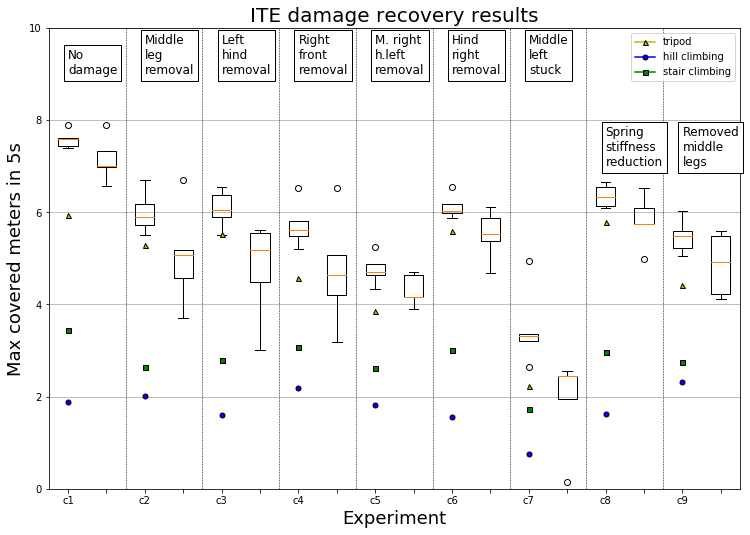

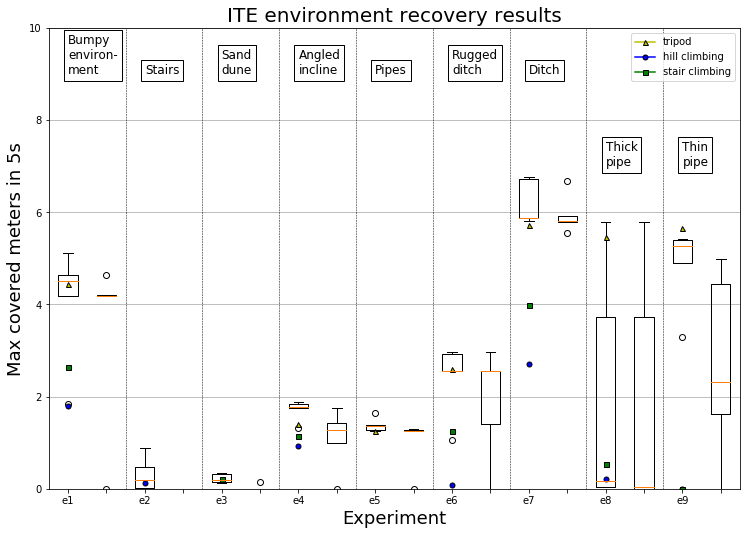

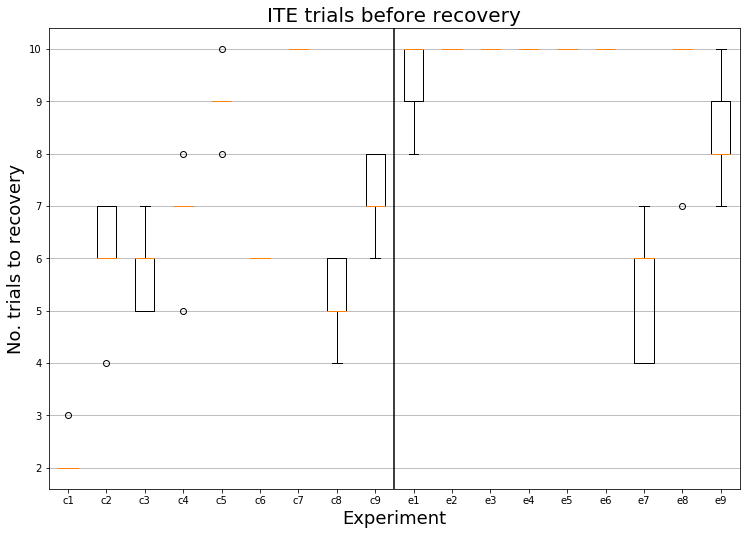

36
[0.05678838368602379, 0.15900537128046888, 0.2156355132005151, 0.17582329715513967, 0.09392809033155636, 0.09944471812972944, 0.4530540230062692, 0.08450768910879203, 0.11088517506513318, 0.1530705422393488, 1.0, 0.8743478737636248, 0.36435694467112767, 0.2662652914298741, 0.21301341226282977, 0.04240585158032506, 0.021906358977356488, 0.44837366573111814]
0.26848956675662405 overall
0.16100802899595865
0.3759711045172895


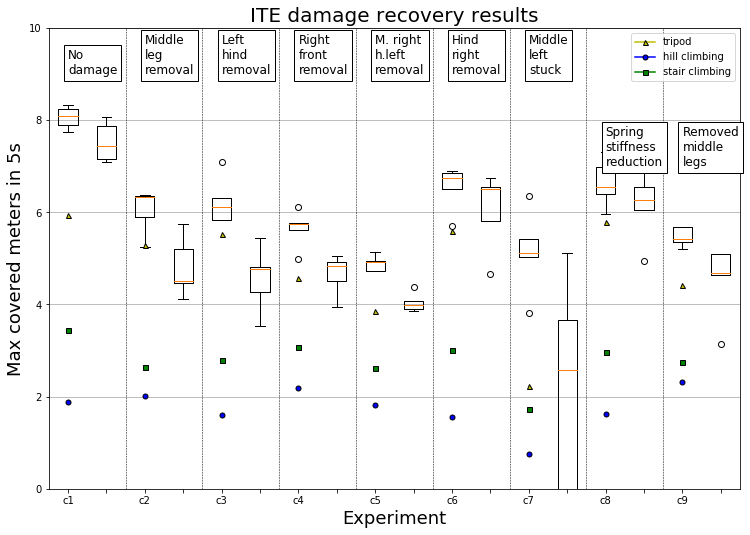

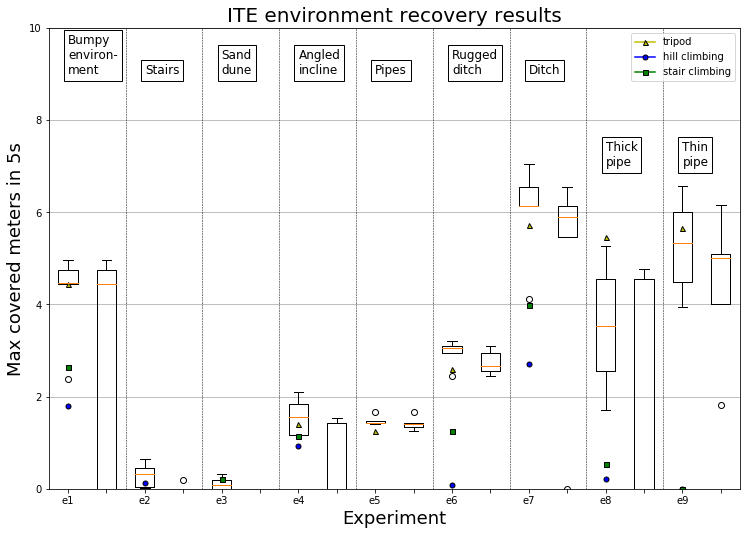

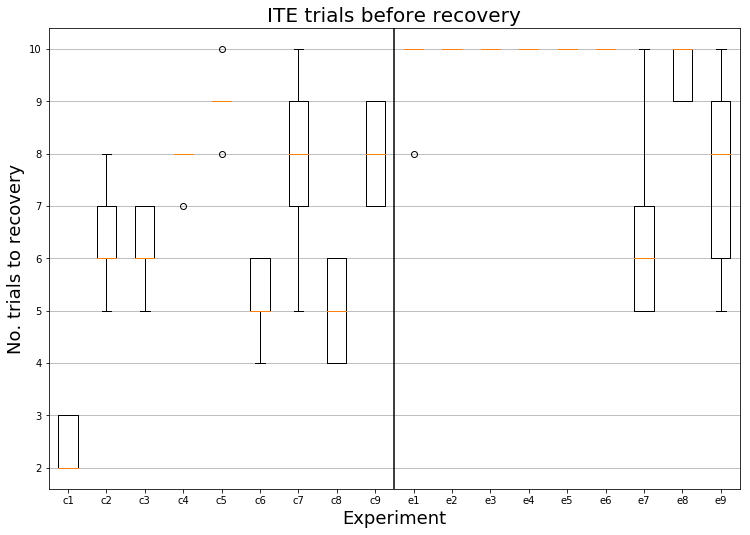

36
[0.06618517494568721, 0.20374277003242147, 0.2677845267721989, 0.176715446763132, 0.17379040137489976, 0.07471389973935438, 0.5591385402776003, 0.06866709912209523, 0.17195530387291647, 0.3255032726053595, 0.86521576126346, 1.0, 0.546531578254719, 0.04041470127381808, 0.07008478457023781, 0.1986904219277693, 0.46980062682235624, 0.16173275713471036]
0.3022592814862631 overall
0.19585479587781174
0.4086637670947144


In [36]:
# present("dc2307")
#/home/aran/itev2/map_stats/dcf0608/iteresults
present("dcf0608")
present("bo0208")

In [34]:
for i in range(9,15):
    print(i)

9
10
11
12
13
14
